# PRACTICA 2

In [2]:
# Importamos las librerias necesarias para poder depurar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Leemos el csv banco
banco = pd.read_csv('./DatasetsLab1/banco ufv.csv', encoding='latin-1', sep=';')
# filtramos solo las columnas que nos interesan
bancofiltrado = banco[['age', 'education', 'balance', 'duration']]
bancofiltrado

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198
...,...,...,...,...
45206,51,tertiary,825,977
45207,71,primary,1729,456
45208,72,secondary,5715,1127
45209,57,secondary,668,508


In [4]:
# Añadimos una columna Rango vacia
bancofiltrado["Rango"] = ""
bancofiltrado

/var/folders/t8/n5_055wn3xj7gs9j0kmw7kkr0000gn/T/ipykernel_90070/3438517381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancofiltrado["Rango"] = ""


,age,education,balance,duration,Rango
0,58,tertiary,2143,261,
1,44,secondary,29,151,
2,33,secondary,2,76,
3,47,unknown,1506,92,
4,33,unknown,1,198,
...,...,...,...,...,...
45206,51,tertiary,825,977,
45207,71,primary,1729,456,
45208,72,secondary,5715,1127,
45209,57,secondary,668,508,


## Rellenamos la columna Rango dependiendo de los valores de balance del dataset

In [5]:
i = 0
for items in bancofiltrado["balance"].values:
    # Si el balance es menor que 0, ponemos en la columna Rango "Deuda"
    if items < 0:
        bancofiltrado.loc[i,"Rango"] = "Deuda"
        i = i + 1
    # Si el balance es menor que mayor que 0 y, mayor que 10.000, ponemos en la columna Rango "Positivo"       
    if items >= 0 and items < 10000:
        bancofiltrado.loc[i,"Rango"] = "Positivo"
        i = i + 1
    # Si el balance es mayor que 10.000, ponemos en la columna Rango "Inversion "
    if items > 10000: 
        bancofiltrado.loc[i,"Rango"] = "Inversion"
        i = i + 1


### Agrupamos por Rango y por tipo de Educacion

In [7]:
porRango = bancofiltrado.groupby("Rango")["education"].value_counts()
# Cambiamos la columna index por "Frecuencia"
porRango = porRango.rename("Frecuencia")
# Lo convertimos en dataSet de la libreria pandas
df = porRango.reset_index()
df



,Rango,education,Frecuencia
0,Deuda,secondary,2311
1,Deuda,tertiary,720
2,Deuda,primary,607
3,Deuda,unknown,128
4,Inversion,tertiary,404
5,Inversion,secondary,301
6,Inversion,primary,84
7,Inversion,unknown,40
8,Positivo,secondary,20590
9,Positivo,tertiary,12177


### Dibujamos graficas para cada tipo de rango

#### En este caso, el Rango es deuda

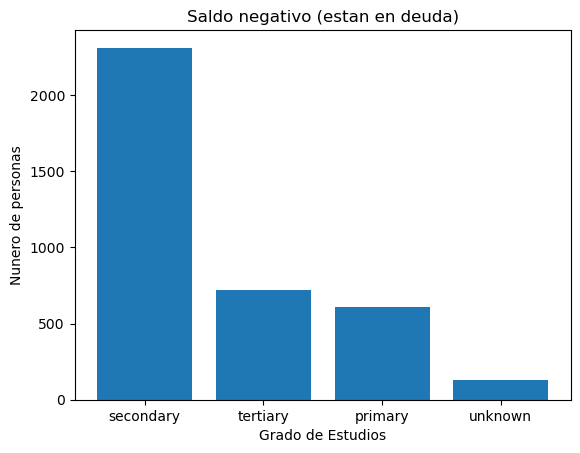

In [44]:
# para Rango Deuda
# filtramos solo los datos que contengan Deuda en la columna Rango
eduacionDeuda = df.loc[df['Rango'] == "Deuda"]

# Dibujamos la grafica
plt.bar(eduacionDeuda["education"],eduacionDeuda["Frecuencia"])
# Le ponemos titulo a la grafica
plt.title('Saldo negativo (estan en deuda)')
# Ponemos lo que representa el eje X
plt.xlabel('Grado de Estudios')
# Ponemos lo que representa el eje Y
plt.ylabel('Numero de personas')
# Lo mostramos
plt.show()

#### Podemos observar que el mayor numero de personas que estan en deuda son las personas con grado secundario. Es decir, personas que no tienen estdudios universitarios. Estas personas no tienen titulo, por lo que tienen menos cantidad de ingresos, y por lo tanto tienen que pedir mas dinero al banco y endeudarse. 

#### Rango: Positivo

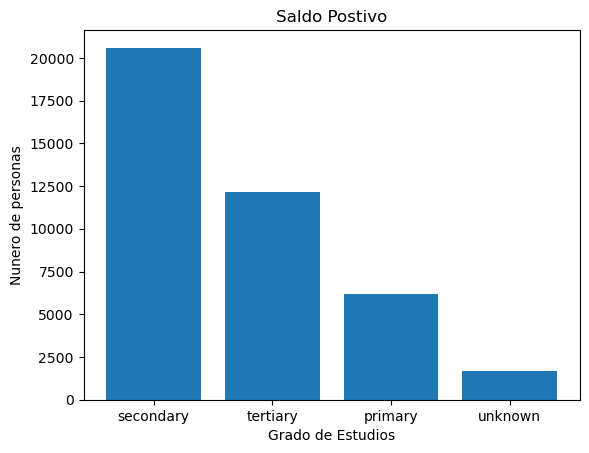

In [48]:
# Filtramos el dataset para cuando Rango es Posotivo
eduacionPositivo = df.loc[df['Rango'] == "Positivo"]
# Dibujamos el diagrama
plt.bar(eduacionPositivo["education"],eduacionPositivo["Frecuencia"])
# Le ponemos titulo al diagrama
plt.title('Saldo Postivo')
# Le ponemos el significado de la variable del eje X
plt.xlabel('Grado de Estudios')
# Le ponemos el significado de la variable del eje Y
plt.ylabel('Numero de personas')
# Mostramos el diagrama
plt.show()

#### Estas personas estan mas repartidas, podemos decir que son personas que da igual el nivel de estudios que tengan, saben manejar su dinero para no tener deudas con el banco

#### Rango: Inversion

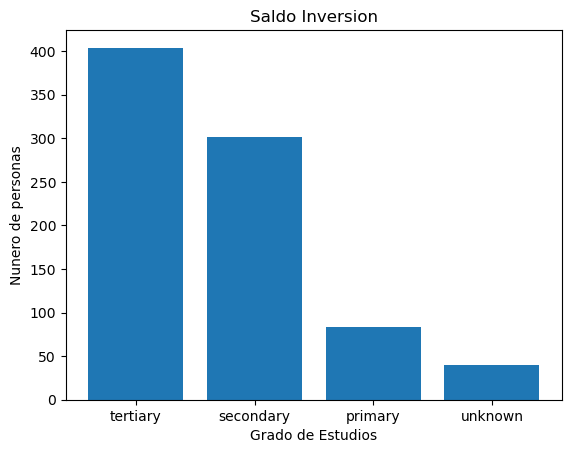

In [8]:
# Filtramos el dataset para los valores de rango igual a Inversion
eduacionInversion = df.loc[df['Rango'] == "Inversion"]
# Dibujamos los datos en un diagrama de barras
plt.bar(eduacionInversion["education"],eduacionInversion["Frecuencia"])
# Le ponemos titulo a la grafica
plt.title('Saldo Inversion')
# Ponemos el significado de la variable del eje X
plt.xlabel('Grado de Estudios')
# Ponemos el significado de la variable del eje Y
plt.ylabel('Nunero de personas')
# Mostramos la grafica
plt.show()

#### El grupo de grados secundarios es el que se destaca más. A pesar de que no tienen títulos universitarios, se distribuyen más o menos por igual en las tres categorías. Si no se miran los datos al principio, se podría pensar que ninguna persona de este grupo está en la categoría de inversión, ya que es poco común que alguien sin estudios tenga suficiente dinero como para que un banco decida invertir con ellos.

In [9]:
# Creamos una columna Rango de edad vacia
bancofiltrado["RangoEdad"] = ""

/var/folders/t8/n5_055wn3xj7gs9j0kmw7kkr0000gn/T/ipykernel_90070/1441326203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancofiltrado["RangoEdad"] = ""


### Rellenamos la columna RangoEdad segun los valores de la edad de los clientes

In [10]:
i = 0
for items in bancofiltrado["age"].values:
    # si la edad es menor de 30 ponemos alumnos en la columna RangoEdad
    if items < 30:
        bancofiltrado.loc[i,"RangoEdad"] = "Alumnos"
        i = i + 1
              
    if items >= 30 and items < 45:
        # si la edad es mayor de 30 y mayor de 45, ponemos Trabajadores en la columna RangoEdad
        bancofiltrado.loc[i,"RangoEdad"] = "Trabajadores"
        i = i + 1
    if items >= 45 and items < 65:
         # si la edad es mayor de 45 y mayor de 65, ponemos Trabajadores Veteranos en la columna RangoEdad
        bancofiltrado.loc[i,"RangoEdad"] = "Trabajadores Veteranos"
        i = i + 1
    if items >= 65: 
        # si la edad es mayor de 65, ponemos No Vinculados en la columna RangoEdad
        bancofiltrado.loc[i,"RangoEdad"] = "No vinculados"
        i = i + 1
        
bancofiltrado.head(20)

,age,education,balance,duration,Rango,RangoEdad
0,58,tertiary,2143,261,Positivo,Trabajadores Veteranos
1,44,secondary,29,151,Positivo,Trabajadores
2,33,secondary,2,76,Positivo,Trabajadores
3,47,unknown,1506,92,Positivo,Trabajadores Veteranos
4,33,unknown,1,198,Positivo,Trabajadores
5,35,tertiary,231,139,Positivo,Trabajadores
6,28,tertiary,447,217,Positivo,Alumnos
7,42,tertiary,2,380,Positivo,Trabajadores
8,58,primary,121,50,Positivo,Trabajadores Veteranos
9,43,secondary,593,55,Positivo,Trabajadores


### Contamos cuantos Trabajadores, alumnos, Trabajadores Veteranos y no vinculados en el dataset

In [12]:
conteo = bancofiltrado['RangoEdad'].value_counts()
# Lo convertimos en dataset
conteo.reset_index()

,index,RangoEdad
0,Trabajadores,24274
1,Trabajadores Veteranos,14854
2,Alumnos,5273
3,No vinculados,810


### Mostramos una grafica con los datos

<AxesSubplot:ylabel='RangoEdad'>

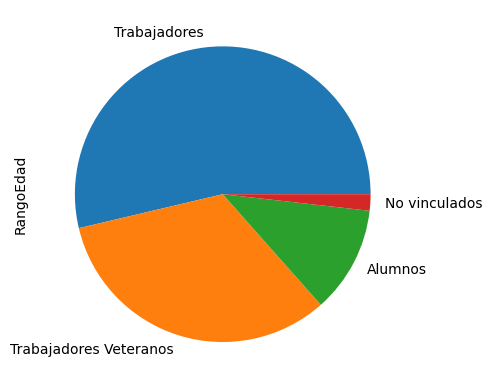

In [13]:
conteo.plot.pie(labels=conteo.index)

#### Más del 75% de los clientes son trabajadores, ya sean veteranos o no, y alrededor de la mitad de los clientes que son trabajadores no son veteranos. En cambio, hay pocos estudiantes, lo que sugiere que este banco no es la mejor opción para estudiantes, ya que no ofrece las mismas ventajas que otros bancos podrían brindar, como menores comisiones por ser estudiante. Este banco parece ser más adecuado para personas adultas que trabajan, que ganan un dinero y desean depositarlo en el banco para ahorrar mientras buscan comprar una casa, un coche, o similar.

### Creamos una nueva columna años, que es el tiempo que llevan los clientes en el banco en años

In [16]:
bancofiltrado["años"] = bancofiltrado["duration"] / 365.25
bancofiltrado

/var/folders/t8/n5_055wn3xj7gs9j0kmw7kkr0000gn/T/ipykernel_90070/2448542050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bancofiltrado["años"] = bancofiltrado["duration"] / 365.25


,age,education,balance,duration,Rango,RangoEdad,años
0,58,tertiary,2143,261,Positivo,Trabajadores Veteranos,0.714579
1,44,secondary,29,151,Positivo,Trabajadores,0.413415
2,33,secondary,2,76,Positivo,Trabajadores,0.208077
3,47,unknown,1506,92,Positivo,Trabajadores Veteranos,0.251882
4,33,unknown,1,198,Positivo,Trabajadores,0.542094
...,...,...,...,...,...,...,...
45206,51,tertiary,825,977,Positivo,Trabajadores Veteranos,2.674880
45207,71,primary,1729,456,Positivo,No vinculados,1.248460
45208,72,secondary,5715,1127,Positivo,No vinculados,3.085558
45209,57,secondary,668,508,Positivo,Trabajadores Veteranos,1.390828


In [17]:
# Años es la columna "años" del dataset
años = bancofiltrado["años"]
# Edad es la columna "age" del dataset
edad = bancofiltrado["age"]

### dibujamos los datos

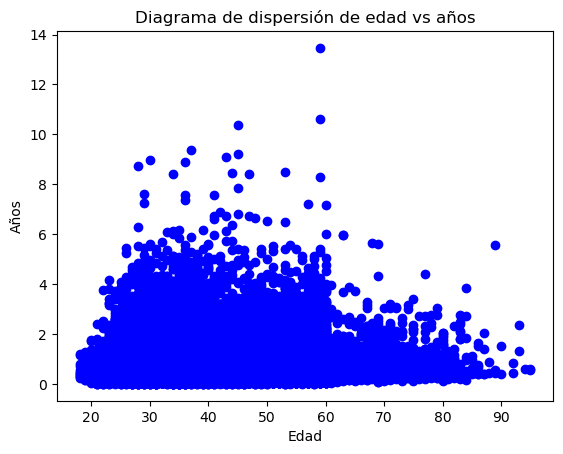

In [18]:
# dibujamos un diagrama scatter
plt.scatter(edad, años, color="blue")
# Ponemos titulo al eje x
plt.xlabel("Edad")
# Ponemos titulo al eje Y
plt.ylabel("Años")
# Ponemos titulo al diagrama
plt.title("Diagrama de dispersión de edad vs años")
# Mostramos el diagrama
plt.show()

#### Podemos observar que la duración más común de los clientes en el banco es de entre 3 y 4 años. También se aprecia que hay muchos clientes nuevos de todas las edades, lo que sugiere que el banco está obteniendo buenos resultados. Por otro lado, hay clientes que llevan casi 14 años en el banco, lo que nos permite inferir que la institución ha estado funcionando durante al menos 14 años.